<a href="https://colab.research.google.com/github/SolracArt23/Modificar-pesos-con-keras/blob/main/Modificaci%C3%B3n_de_pesos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pesos Keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as kr
import tensorflow as tf

Extraeremos el dataset de **california_housing_train.csv** para crear un modelo ML y porceder a modificar sus pesos para tener una prediccion lo mas optima posible

In [ ]:
Dataset=pd.read_csv('/content/sample_data/california_housing_train.csv')
Dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Para este ejemplo predeciremos el valor medio de la vivienda con respecto a numero de habitaciones y edad media de la casa

In [ ]:
#Data que tendremos
x_Data =np.array( [Dataset['housing_median_age'],Dataset['total_bedrooms']]).astype('float64')

#Datos a hallar
y_Data =np.array(Dataset['median_house_value']).astype('float64')


In [ ]:
pd.DataFrame(x_Data.T,columns=['housing_median_age','total_bedrooms'])

,housing_median_age,total_bedrooms
0,15.0,1283.0
1,19.0,1901.0
2,17.0,174.0
3,14.0,337.0
4,20.0,326.0
...,...,...
16995,52.0,394.0
16996,36.0,528.0
16997,17.0,531.0
16998,19.0,552.0


In [ ]:
pd.DataFrame([f"$ {x}" for x in y_Data],columns=['Price'])

,Price
0,$ 66900.0
1,$ 80100.0
2,$ 85700.0
3,$ 73400.0
4,$ 65500.0
...,...
16995,$ 111400.0
16996,$ 79000.0
16997,$ 103600.0
16998,$ 85800.0


In [ ]:
len(y_Data)

17000

mostraremos su importancia y relacion 

In [ ]:
max(x_Data[1])

6445.0

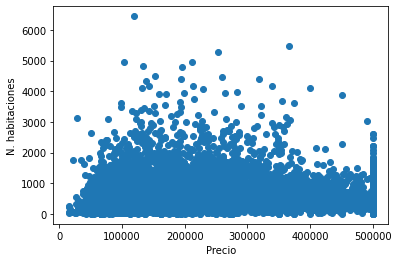

In [ ]:
plt.ylabel('N. habitaciones')
plt.xlabel('Precio')
plt.plot(y_Data,x_Data[1],'o')

# **Crear Perceptron**

In [ ]:
Model = kr.Sequential([
                       #input layer
                       kr.layers.Dense(2,kernel_initializer='zeros',input_dim=2),
                       #output layer
                       kr.layers.Dense(1,kernel_initializer='ones')
])
#optimizador
Model.compile(loss='mean_squared_error',optimizer='rmsprop',metrics=['mean_squared_error'])
pesos=Model.get_weights()


In [ ]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


#Comprecion de pesos

Numero de conexiones del **input_shape** con peso zero

```
input_dim=2
```
si cambias el **2** cambiaras el tamaño de la matriz


In [ ]:
pesos[0]

array([[0., 0.],
       [0., 0.]], dtype=float32)

conexion con las neuronas creadas 

```
kr.layers.Dense(2),
```



In [ ]:
pesos[1]

array([0., 0.], dtype=float32)

**Pesos de la siguiente capa**: por ultimo estos se etablecen con los pesos de las siguientes capaz

In [ ]:
pesos[-2]

array([[1.],
       [1.]], dtype=float32)

**Peso Resultante**: por ultimo los pesos resultatantes que simpre valdran zeros

In [ ]:
pesos[-1]

array([0.], dtype=float32)

# Entrenamiento Modelo

Presentacion de estado de la data de **x_Data** con respecto a los inputs de nuestro modelo

In [ ]:
x_Data.T

array([[  15., 1283.],
       [  19., 1901.],
       [  17.,  174.],
       ...,
       [  17.,  531.],
       [  19.,  552.],
       [  52.,  300.]])

In [ ]:
Model.fit(x=x_Data.T,y=y_Data,epochs=5)

Epoch 1/5
532/532 [==============================] - 2s 2ms/step - loss: 56247709696.0000 - mean_squared_error: 56247709696.0000
Epoch 2/5
532/532 [==============================] - 1s 2ms/step - loss: 55715557376.0000 - mean_squared_error: 55715557376.0000
Epoch 3/5
532/532 [==============================] - 2s 3ms/step - loss: 54928654336.0000 - mean_squared_error: 54928654336.0000
Epoch 4/5
532/532 [==============================] - 2s 3ms/step - loss: 53905457152.0000 - mean_squared_error: 53905457152.0000
Epoch 5/5
532/532 [==============================] - 1s 2ms/step - loss: 52648718336.0000 - mean_squared_error: 52648718336.0000


**Evaluacion del modelo y primera prediccion**

In [ ]:
Model.evaluate(x_Data.T,y_Data)

532/532 [==============================] - 2s 2ms/step - loss: 51944861696.0000 - mean_squared_error: 51944861696.0000


[51944861696.0, 51944861696.0]

**Prediccion**

In [ ]:
Model.predict([[15.0,1283.0]])

array([[25180.908]], dtype=float32)

# Modificar pesos

Guardaremos el modelo para diferenciar el modelo principal del modificado

In [ ]:
#Guardar modelo
Model.save('prueba.h5')
#Cargar modelo
des_model= kr.models.load_model('/content/prueba.h5')

**Creacion de Capa externa:**
* Esta capa debera contener el mismo numerio de neuronas que la capa objetiva
```
# Capa original
kr.layers.Dense(1,kernel_initializer='ones')
```
```
#Capa Externa
layer =  kr.layers.Dense(1,kernel_initializer=tf.initializers.constant(x.))
```


*  Crearemos una nueva capa externa donde 
  aplicaremos el cambio de peso,donde **x** es el peso a cambiar;
```
tf.initializers.constant(x)
```



**Abrir canales de entrada de la capa externa:**
Como sabemos todas las capas transfoman sus dimensiones con respecto a la capa anterior, sin embargo, nuestra capa externa no tiene una previa conexion, es por eso que usaremos la funcion **tf.convert_to_tensor** donde pasaremos como parametro ya sea una matriz o vector.


```
#Apertura de canales
layer(tf.convert_to_tensor([[1., 2.]]))
```



**Codigo**

In [ ]:
layer = kr.layers.Dense(1,kernel_initializer= tf.initializers.constant(3.))

In [ ]:
layer(tf.convert_to_tensor([[1,2]]))
layer.get_weights()# visualizacion de peso

[array([[3.],
        [3.]], dtype=float32), array([0.], dtype=float32)]

# Implementacion de capa externa en modelo

**Seleccion y Cambio de Capa:**
Ahora cogeremos el modelo que cargamos y seleccionaremos la capa que usamos como referencia 


```
capa2=des_model.layers[x] # x es la posicion de la capa
```
Una vez seleccionada la capa procederemos a tomar sus pesos atraves de la  funcion **set_weights** y los cambiaremos con la capa externa con la funcion de **y.get_weights** (*donde **y** es la capa externa*).


```
capa2.set_weights(layer.get_weights())
```
Ahora solo regresamos la capa con los pesos modificados al modelo


```
des_model.layers[x] = capa2
```





**Codigo**

In [ ]:
capa2=des_model.layers[1]
capa2.set_weights(layer.get_weights())
des_model.layers[1] = capa2

Comprobacion de cambio de peso

In [ ]:
des_model.get_weights()

[array([[2.6501434, 2.6501434],
        [2.636215 , 2.636215 ]], dtype=float32),
 array([2.6652997, 2.6652997], dtype=float32),
 array([[3.],
        [3.]], dtype=float32),
 array([0.], dtype=float32)]

**Evaluando modelo y primera prediccion**


In [ ]:
des_model.evaluate(x_Data.T,y_Data)

532/532 [==============================] - 1s 2ms/step - loss: 52741541888.0000 - mean_squared_error: 52741541888.0000


[52741541888.0, 52741541888.0]

In [ ]:
des_model.predict([[15.0,1283.0]])

array([[20548.086]], dtype=float32)

#Probar y comparar modelo original y modificado

In [ ]:
#Numero de habitaciones
rooms = float(input("escribe el numero de habitaciones: "))
#Antiguedad
older = float(input("escribe cuantos años tiene tu casa: "))

escribe el numero de habitaciones: 23
escribe cuantos años tiene tu casa: 23


In [ ]:
#Modelo original
pe1=Model.predict([[rooms,older]])
#Modelo modificado
pe2=des_model.predict([[rooms,older]])
print(f' prediccion modelo original ${pe1[0,0]}USD\n prediccion modelo modificado: ${pe2[0,0]}USD')

 prediccion modelo original $916.1510009765625USD
 prediccion modelo modificado: $745.50927734375USD


Comparacion con precio establecido

In [ ]:
print(f' precio original ${y_Data[24]}USD\n\n predccion modelo original ${Model.predict([[ 18., 397.]])}USD      prediccion modelo modificado: ${des_model.predict([[ 18., 397.]])}USD')

 precio original $53500.0USD

 predccion modelo original $[[8067.394]]USD      prediccion modelo modificado: $[[6581.671]]USD


In [ ]:
Model.predict([[ 18., 397.]])

array([[8067.394]], dtype=float32)

In [ ]:
x_Data.T[24]

array([ 18., 397.])